In [1]:
import numpy as np
import matplotlib.pyplot as plt

def set_parameters(initial_population=50, birth_rate=0.1, death_rate=0.1, carrying_capacity=500, max_time=100):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'carrying_capacity': carrying_capacity,
        'max_time': max_time
    }

def run_simulation(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    carrying_capacity = params['carrying_capacity']
    max_time = params['max_time']
    
    time_points = [0]
    population_sizes = [population]
    
    while population > 0 and time_points[-1] < max_time:
        next_event_time = np.random.exponential(1 / (death_rate * population + birth_rate * population))
        
        if np.random.rand() < birth_rate / (birth_rate + death_rate) and population < carrying_capacity:
            population += 1
        else:
            population -= 1
        
        time_points.append(time_points[-1] + next_event_time)
        population_sizes.append(population)
    
    return time_points, population_sizes

def run_multiple_simulations_with_quantiles(params, num_simulations=100):
    all_time_points = []
    all_population_sizes = []
    extinction_count = 0
    max_time = params['max_time']
    
    for _ in range(num_simulations):
        time_points, population_sizes = run_simulation(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)
        if population_sizes[-1] == 0:
            extinction_count += 1

    # Interpolating population sizes
    num_points = 1000
    average_time_points = np.linspace(0, max_time, num_points)
    interpolated_populations = np.zeros((num_simulations, num_points))
    
    for i in range(num_simulations):
        interpolated_populations[i] = np.interp(average_time_points, all_time_points[i], all_population_sizes[i])
    
    average_population_sizes = np.mean(interpolated_populations, axis=0)
    lower_quantile = np.quantile(interpolated_populations, 0.05, axis=0)
    upper_quantile = np.quantile(interpolated_populations, 0.95, axis=0)
    
    extinction_probability = extinction_count / num_simulations
    
    return average_time_points, average_population_sizes, lower_quantile, upper_quantile, extinction_probability

def plot_multiple_simulations_with_quantiles(average_time_points, average_population_sizes, lower_quantile, upper_quantile):
    plt.figure(figsize=(10, 6))
    plt.plot(average_time_points, average_population_sizes, color='purple', linestyle='-', label='Average Population Size')
    plt.fill_between(average_time_points, lower_quantile, upper_quantile, color='orchid', alpha=0.5, label='Quantile Range')
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Population Size over Time')
    plt.legend()
    plt.show()



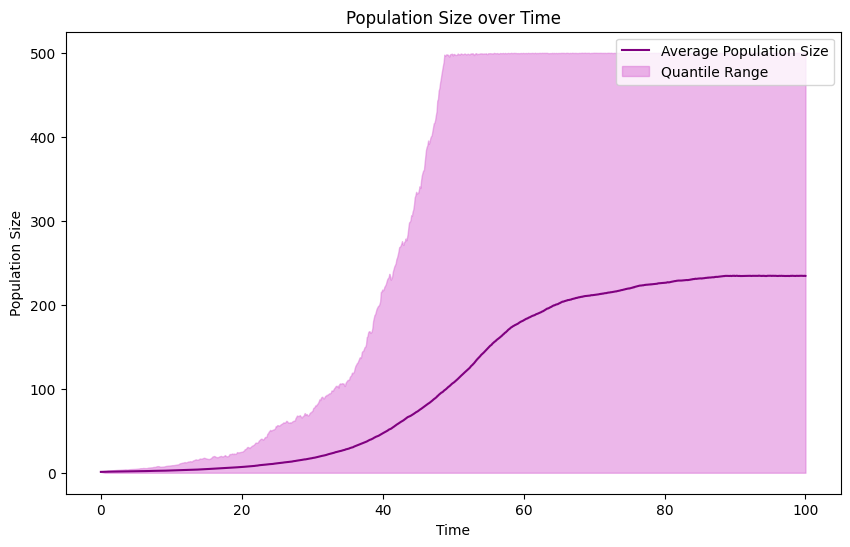

Extinction Probability: 0.53


In [4]:
# Example usage
params = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1, carrying_capacity=500)
num_simulations = 100
average_time_points, average_population_sizes, lower_quantile, upper_quantile, extinction_probability = run_multiple_simulations_with_quantiles(params, num_simulations)

plot_multiple_simulations_with_quantiles(average_time_points, average_population_sizes, lower_quantile, upper_quantile)

print(f"Extinction Probability: {extinction_probability:.2f}")

Same model with individual growth curves plotted

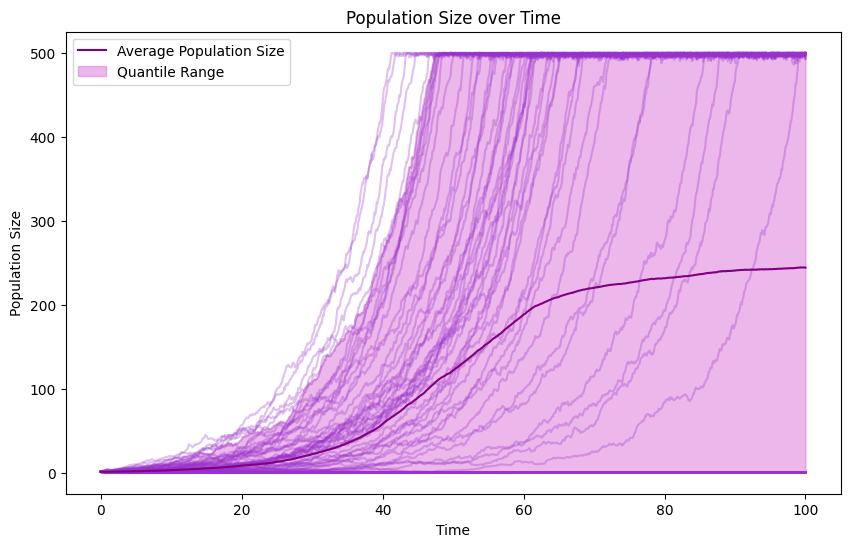

Extinction Probability: 0.51


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def set_parameters(initial_population=50, birth_rate=0.1, death_rate=0.1, carrying_capacity=500, max_time=100):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'carrying_capacity': carrying_capacity,
        'max_time': max_time
    }

def run_simulation(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    carrying_capacity = params['carrying_capacity']
    max_time = params['max_time']

    time_points = [0]
    population_sizes = [population]

    while population > 0 and time_points[-1] < max_time:
        next_event_time = np.random.exponential(1 / (death_rate * population + birth_rate * population))

        if np.random.rand() < birth_rate / (birth_rate + death_rate) and population < carrying_capacity:
            population += 1
        else:
            population -= 1

        time_points.append(time_points[-1] + next_event_time)
        population_sizes.append(population)

    return time_points, population_sizes

def run_multiple_simulations_with_quantiles(params, num_simulations=100):
    all_time_points = []
    all_population_sizes = []
    extinction_count = 0
    max_time = params['max_time']

    for _ in range(num_simulations):
        time_points, population_sizes = run_simulation(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)
        if population_sizes[-1] == 0:
            extinction_count += 1

    # Interpolating population sizes
    num_points = 1000
    average_time_points = np.linspace(0, max_time, num_points)
    interpolated_populations = np.zeros((num_simulations, num_points))

    for i in range(num_simulations):
        interpolated_populations[i] = np.interp(average_time_points, all_time_points[i], all_population_sizes[i])

    average_population_sizes = np.mean(interpolated_populations, axis=0)
    lower_quantile = np.quantile(interpolated_populations, 0.05, axis=0)
    upper_quantile = np.quantile(interpolated_populations, 0.95, axis=0)

    extinction_probability = extinction_count / num_simulations

    return average_time_points, interpolated_populations, average_population_sizes, lower_quantile, upper_quantile, extinction_probability

def plot_multiple_simulations_with_quantiles(average_time_points, interpolated_populations, average_population_sizes, lower_quantile, upper_quantile):
    plt.figure(figsize=(10, 6))

    for simulation in interpolated_populations:
        plt.plot(average_time_points, simulation, color='darkorchid', alpha=0.3)
        
    plt.plot(average_time_points, average_population_sizes, color='purple', linestyle='-', label='Average Population Size')
    plt.fill_between(average_time_points, lower_quantile, upper_quantile, color='orchid', alpha=0.5, label='Quantile Range')
    
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Population Size over Time')
    plt.legend()
    plt.show()

# Example usage
params = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1, carrying_capacity=500)
num_simulations = 100
average_time_points, interpolated_populations, average_population_sizes, lower_quantile, upper_quantile, extinction_probability = run_multiple_simulations_with_quantiles(params, num_simulations)

plot_multiple_simulations_with_quantiles(average_time_points, interpolated_populations, average_population_sizes, lower_quantile, upper_quantile)

print(f"Extinction Probability: {extinction_probability:.2f}")

Survival Conditioned Version

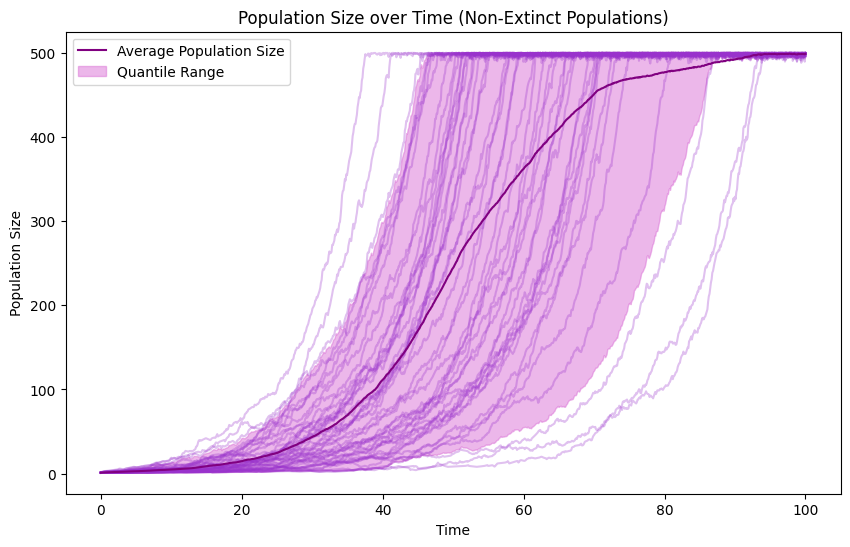

Extinction Probability: 0.53


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def set_parameters(initial_population=50, birth_rate=0.1, death_rate=0.1, carrying_capacity=500, max_time=100):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'carrying_capacity': carrying_capacity,
        'max_time': max_time
    }

def run_simulation(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    carrying_capacity = params['carrying_capacity']
    max_time = params['max_time']

    time_points = [0]
    population_sizes = [population]

    while population > 0 and time_points[-1] < max_time:
        next_event_time = np.random.exponential(1 / (death_rate * population + birth_rate * population))

        if np.random.rand() < birth_rate / (birth_rate + death_rate) and population < carrying_capacity:
            population += 1
        else:
            population -= 1

        time_points.append(time_points[-1] + next_event_time)
        population_sizes.append(population)

    return time_points, population_sizes

def run_multiple_simulations_with_quantiles(params, num_simulations=100):
    all_time_points = []
    all_population_sizes = []
    extinction_count = 0
    max_time = params['max_time']

    for _ in range(num_simulations):
        time_points, population_sizes = run_simulation(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)
        if population_sizes[-1] == 0:
            extinction_count += 1

    # Interpolating population sizes for non-extinct populations
    num_points = 1000
    average_time_points = np.linspace(0, max_time, num_points)
    non_extinct_populations = [pop for pop in all_population_sizes if pop[-1] > 0]
    non_extinct_times = [time for time, pop in zip(all_time_points, all_population_sizes) if pop[-1] > 0]
    non_extinct_interpolations = np.zeros((len(non_extinct_populations), num_points))

    for i, (time, pop) in enumerate(zip(non_extinct_times, non_extinct_populations)):
        non_extinct_interpolations[i] = np.interp(average_time_points, time, pop)

    average_population_sizes = np.mean(non_extinct_interpolations, axis=0)
    lower_quantile = np.quantile(non_extinct_interpolations, 0.05, axis=0)
    upper_quantile = np.quantile(non_extinct_interpolations, 0.95, axis=0)

    extinction_probability = extinction_count / num_simulations

    return average_time_points, non_extinct_interpolations, average_population_sizes, lower_quantile, upper_quantile, extinction_probability

def plot_multiple_simulations_with_quantiles(average_time_points, non_extinct_interpolations, average_population_sizes, lower_quantile, upper_quantile):
    plt.figure(figsize=(10, 6))

    for simulation in non_extinct_interpolations:
        plt.plot(average_time_points, simulation, color='darkorchid', alpha=0.3)
        
    plt.plot(average_time_points, average_population_sizes, color='purple', linestyle='-', label='Average Population Size')
    plt.fill_between(average_time_points, lower_quantile, upper_quantile, color='orchid', alpha=0.5, label='Quantile Range')
    
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Population Size over Time - Survival Conditioned')
    plt.legend()
    plt.show()

# Example usage
params = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1, carrying_capacity=500)
num_simulations = 100
average_time_points, non_extinct_interpolations, average_population_sizes, lower_quantile, upper_quantile, extinction_probability = run_multiple_simulations_with_quantiles(params, num_simulations)

plot_multiple_simulations_with_quantiles(average_time_points, non_extinct_interpolations, average_population_sizes, lower_quantile, upper_quantile)

print(f"Extinction Probability: {extinction_probability:.2f}")
